This code is a result of a recent research on portfolio theory. One can see the paper

 ***Halidias, Nikolaos. "A novel portfolio optimization method and its application to the hedging problem" Monte Carlo Methods and Applications, vol. 30, no. 3, 2024, pp. 249-267,*** and the references therein. (https://www.degruyterbrill.com/document/doi/10.1515/mcma-2024-2009/html)

See also the book
***Halidias, Nikolaos and Stamatiou, Ioannis S.. Stochastic Analysis: Financial Mathematics with Matlab®, De Gruyter, 2026.*** (https://www.degruyterbrill.com/document/isbn/9783111443737/html?lang=en&srsltid=AfmBOorukbLCPRdRPn2Mu2kqSWiGttsEAPF6wBfVNixx4fAFzxycr6Fl)

At the webpage of the ***Actuarial-Financial Laboratory*** https://www.samos.aegean.gr/actuar/nick/actfinlabeng.htm one can find also other useful informations.



We use all the call and put options from the yahoo finace in order to construct the portfolio. If you choose experiment=1 then we use the lastPrices otherwise the bid-ask prices. If for any reason you want to take account only some of the call and put options you should manually set the data stock_value, call_strikes,put_strikes,call_ask,call_bid,put_ask,put_bid.



The payoff of the option should have finite number of branches where the last branch should be a linear function. You should find the slope of the last branch and all the points that changes branch.


We compute the set of arbitrage free prices and the fair and arbitrage free price $Y^{D^*}$ as this has been proposed at the above paper. Though we can propose several fair prices this fair price is the only one which is also arbitrage free for sure. Therefore this price can be seen as the unique fair and arbitrage free price in some sense.

In practice, before the expiration you should have:

1.   The amount 100*strike price for each call you have bought
2.   100 shares for each call that you have sell
3.   100 shares for each put that you have bought
4.   The amount 100*strike price for each put that you have sell



If you want to download data from Yahoo finance you should set Data_given=1. Otherwise you should have an excel file from which the data will be stored.

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 0.15499999999829392
              x: [ 1.727e-12  1.450e-01 ...  0.000e+00  1.550e-01]
 mip_node_count: 9
 mip_dual_bound: 0.15499999999829392
        mip_gap: 0.0
+--------+------------------------+-------+------------------------+
| Shares |    Number of Shares    | Price |   Amount for Shares    |
+--------+------------------------+-------+------------------------+
|  TSLA  | 1.7266299501272897e-12 |  6.34 | 1.0946833883807017e-11 |
+--------+------------------------+-------+------------------------+
+----------------+--------------+-------------------+----------------------+
| Type of Option | Strike Price | Number of Options | Price of each Option |
+----------------+--------------+-------------------+----------------------+
|      Call      |     5.5      |                 1 |         2.0          |
+----------------+--------------+-----------

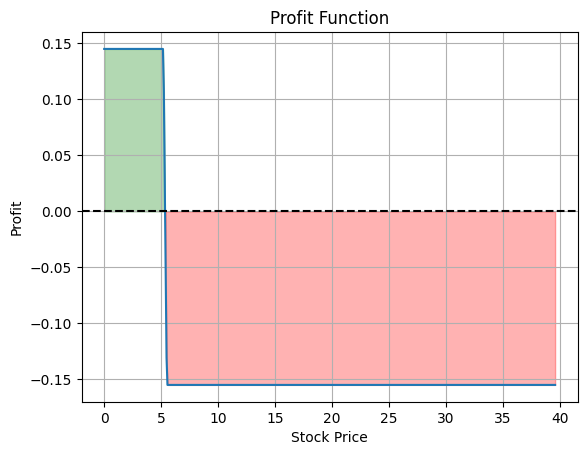

In [ ]:
import numpy as np


#############################################################################################################
# You should set the following data
Data_given=0 # Set 1 if you want to download data from Yahoo finance otherwise read data from excel file
V = 2.145  # Possible price of the option
Firm='TSLA'
ExpirationDate='2025-05-30'
excel_file='excel2_file.xlsx'
experiment=0 # Set 1 if you want to experiment. Then the lastPrices will be used otherwise the bid-ask prices
max_number_of_total_call_options_to_buy=40 # Maximum number of total call options  to buy
max_number_of_total_put_options_to_buy=40 # Maximum number of total put options to buy
max_number_of_total_call_options_to_sell=40 # Maximum number of total call options to sell
max_number_of_total_put_options_to_sell=40 # Maximum number of total put options to sell
max_number_of_call_options_to_buy=5  # the number of maximum number of call options of each strike to buy
max_number_of_put_options_to_buy=5 # the number of maximum number of put options of each strike to buy
max_number_of_call_options_to_sell=5 # the number of maximum number of call options of each strike to sell
max_number_of_put_options_to_sell=5 # the number of maximum number of put options of each strike to sell
max_number_of_shares_to_buy=100
max_number_of_shares_to_sell=100
max_amount_to_bank_account=10
max_amount_from_bank_account=10
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# Give the following information for the new option
def payoff_function(x):
    return np.maximum(x-5.2,0)
derivative_of_payoff=1
payoff_nodes=np.array([[5.2]])
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
###################################################################################################################




#######################################################################################################################
# Here is the function that download the data from yahoo finance
def options_bid_ask(Firm,ExpirationDate,experiment):
    import numpy as np
    import yfinance as yt
    stock = yt.Ticker(Firm)
    stock_value = stock.history(period='1d')['Close'].iloc[-1]
    options_chain = stock.option_chain(ExpirationDate)
    call_strikes=options_chain.calls.strike.to_numpy()
    put_strikes=options_chain.puts.strike.to_numpy()
    if experiment==1:
       call_ask = options_chain.calls.lastPrice.to_numpy()
       call_bid=options_chain.calls.lastPrice.to_numpy()
       put_ask=options_chain.puts.lastPrice.to_numpy()
       put_bid=options_chain.puts.lastPrice.to_numpy()
    else:
       call_ask = options_chain.calls.ask.to_numpy()
       call_bid=options_chain.calls.bid.to_numpy()
       put_ask=options_chain.puts.ask.to_numpy()
       put_bid=options_chain.puts.bid.to_numpy()
    return stock_value, call_strikes,put_strikes,call_ask,call_bid,put_ask,put_bid
############################################################################################################


##################################################################################################
# Here is the function that take the data from the excel file.
def options_bid_ask_excel(experiment):
    import pandas as pd
    import numpy as np
    try:
        df = pd.read_excel(excel_file)
        stock_value = df.iloc[0, 0]
        call_strikes = df.iloc[:, 1].dropna().to_numpy()
        put_strikes = df.iloc[:, 5].dropna().to_numpy()
        if experiment==1:
            call_ask = df.iloc[:, 2].dropna().to_numpy()
            call_bid = df.iloc[:, 2].dropna().to_numpy()
            put_ask = df.iloc[:, 6].dropna().to_numpy()
            put_bid = df.iloc[:, 6].dropna().to_numpy()
        else:
            call_ask = df.iloc[:, 4].dropna().to_numpy()
            call_bid = df.iloc[:, 3].dropna().to_numpy()
            put_ask = df.iloc[:, 8].dropna().to_numpy()
            put_bid = df.iloc[:, 7].dropna().to_numpy()
        return stock_value, call_strikes,put_strikes,call_ask,call_bid,put_ask,put_bid
    except FileNotFoundError: # Added a basic except block to handle file not found errors
        print("Error: 'excel_file.xlsx' not found. Please make sure the file exists in the current directory.")
        return None, None, None, None, None, None, None # Return None values if file not found
####################################################################################################################






##########################################################################################
# Here we choose how we collect the data
if Data_given==1:
   stock_value, call_strikes,put_strikes,call_ask1,call_bid,put_ask1,put_bid=options_bid_ask(Firm,ExpirationDate,experiment)
else:
   stock_value, call_strikes,put_strikes,call_ask1,call_bid,put_ask1,put_bid=options_bid_ask_excel(experiment)
###########################################################################################







#########################################################################################
# These data  are for experiments
#stock_value=8
#call_strikes=np.array([7,8])
#put_strikes=np.array([7,8,9])
#call_ask1=np.array([4,3])
#call_bid=np.array([3.9,2.9])
#put_ask1=np.array([3,4,5])
#put_bid=np.array([2.9,3.9,4.9])
######################################################################################

#####################################################################################
# We will remove zeros from the ask prices
keep_mask_call = call_ask1 != 0
keep_mask_put = put_ask1 !=0
call_ask = call_ask1[keep_mask_call]
call_bid = call_bid[keep_mask_call]
put_ask = put_ask1[keep_mask_put]
put_bid = put_bid[keep_mask_put]
call_strikes=call_strikes[keep_mask_call]
put_strikes=put_strikes[keep_mask_put]
#######################################################################################


###############################################################################################
union_strikes1=np.union1d(call_strikes,put_strikes) #The union of call_strikes and put_strikes
union_strikes=np.union1d(union_strikes1,payoff_nodes) # We add the payoff nodes
max_element = union_strikes.max() # We need this for the plot
##########################################################################################


#############################################################################################
# This will give the row of the matrix A for each strike price.
# The first element is the number of shares, next bank account, next call options to buy,
# call options to sell, put options to buy, put options to sell and the maximum loss
def PP(x):
    matrixrow = np.maximum(x - call_strikes, 0) #call to buy
    matrixrow = np.append(matrixrow, -np.maximum(x-call_strikes, 0)) # call to sell
    matrixrow=np.append(matrixrow, np.maximum(put_strikes-x, 0)) # put to buy
    matrixrow=np.append(matrixrow, -np.maximum(put_strikes-x, 0)) # put to sell
    matrixrow=np.append(1,matrixrow) # bank account
    matrixrow = np.append(x, matrixrow) # shares
    matrixrow = np.append(matrixrow, 1) # maximum loss
    return matrixrow
###############################################################################################



###########################################################################################
# We begin to set the matrix AA
AA = PP(0)
number_of_columns_AA = AA.shape[0]
for x in union_strikes:
    AA=np.vstack([AA, PP(x)])
AA = -AA
###########################################################################################


############################################################################################
# Adding the row with the derivative
Aderiv = np.zeros(number_of_columns_AA)
for i in range(1,len(call_strikes)+2):
    Aderiv[i] = -1
for i in range(len(call_strikes)+2, 2*len(call_strikes)+2):
    Aderiv[i] = 1
Aderiv[1]=0
Aderiv[0]=-1
AA = np.vstack([AA, Aderiv])
############################################################################################






#########################################################################################
# Adding the row with options prices
Aequality=call_ask
Aequality=np.append(Aequality,-call_bid)
Aequality=np.append(Aequality,put_ask)
Aequality=np.append(Aequality,-put_bid)
Aequality=np.append(1,Aequality) # Bank account
Aequality=np.append(stock_value,Aequality)
Aequality=np.append(Aequality,0)
AA=np.vstack([AA,Aequality])
#########################################################################################



########################################################################################
# Adding the rows for the maximum number of options
Amaxnumberoptions_call_buy=np.full(number_of_columns_AA,0)
Amxanumberoptions_call_sell=np.full(number_of_columns_AA,0)
Amaxnumberoptions_put_buy=np.full(number_of_columns_AA,0)
Amaxnumberoptions_put_sell=np.full(number_of_columns_AA,0)
for i in range(2,len(call_strikes)+2):
    Amaxnumberoptions_call_buy[i]=1
for i in range(len(call_strikes)+2,2*len(call_strikes)+2):
    Amxanumberoptions_call_sell[i]=1
for i in range(2*len(call_strikes)+2,2*len(call_strikes)+len(put_strikes)+2):
    Amaxnumberoptions_put_buy[i]=1
for i in range(2*len(call_strikes)+len(put_strikes)+2,2*len(call_strikes)+2*len(put_strikes)+2):
    Amaxnumberoptions_put_sell[i]=1
AA=np.vstack([AA,Amaxnumberoptions_call_buy])
AA=np.vstack([AA,Amxanumberoptions_call_sell])
AA=np.vstack([AA,Amaxnumberoptions_put_buy])
AA=np.vstack([AA,Amaxnumberoptions_put_sell])
#############################################################################################




######################################################################################
# Setting the right hand side
b = np.zeros(AA.shape[0])
b[0]=-payoff_function(0)
for i in range(1,len(union_strikes)+1):
    b[i] =  - payoff_function(union_strikes[i-1]) # For the writer this should be (-)
b[-4]=max_number_of_total_call_options_to_buy
b[-3]=max_number_of_total_call_options_to_sell
b[-2]=max_number_of_total_put_options_to_buy
b[-1]=max_number_of_total_put_options_to_sell
b[len(union_strikes)+1]=-derivative_of_payoff # for the row with the derivatives
b[-5]=V # for the total amount used
#######################################################################################



####################################################################
# Setting the left hand side
bl=np.full_like(b, -np.inf, dtype=float)
bl[-5]=V
####################################################################




#######################################################################
# Setting the upper bounds for the parameters
ub=np.full(AA.shape[1], 0, dtype=float)
ub[0]=max_number_of_shares_to_buy
ub[1]=max_amount_to_bank_account # Bank account
for i in range(2,len(call_strikes)+2):
        ub[i]=max_number_of_call_options_to_buy
for i in range(2*len(call_strikes)+2,2*len(call_strikes)+len(put_strikes)+2):
        ub[i]=max_number_of_put_options_to_buy
for i in range(len(call_strikes)+2,2*len(call_strikes)+2):
        ub[i]=max_number_of_call_options_to_sell
for i in range(2*len(call_strikes)+len(put_strikes)+2,2*len(call_strikes)+2*len(put_strikes)+2):
        ub[i]=max_number_of_put_options_to_sell
ub[-1]=np.inf
########################################################################






###################################################################
# Setting the lower bounds for the parameters
lb=np.full(AA.shape[1], 0, dtype=float)
lb[0]=-max_number_of_shares_to_sell
lb[-1]=-np.inf
lb[1]=-max_amount_from_bank_account # bank account
###################################################################

###################################################################
# We define the constraints and the bounds
from scipy.optimize import LinearConstraint
constraints=LinearConstraint(AA,bl,b)
from scipy.optimize import Bounds
bounds=Bounds(lb,ub)
##################################################################


###########################################################################
# We assume that we can buy  only integer number of options
integrality=np.full(AA.shape[1],1)
integrality[0]=0 # 1 for integer number of shares, 0 for fractional number of shares
integrality[-1]=0
integrality[1]=0 # bank account
############################################################################

#####################################################################
# We set the quantity to be minimized
f=np.zeros(AA.shape[1])
f[-1]=1
#######################################################################


#########################################################################
# We solve the optimization problem
from scipy.optimize import milp
result = milp(c=f, constraints=constraints, integrality=integrality, bounds=bounds)
print(result)
x = result.x
###########################################################################




#############################################################################
# We construct the table of results
from prettytable import PrettyTable
t = PrettyTable(['Shares', 'Number of Shares', 'Price', 'Amount for Shares'])
t.add_row([Firm, x[0], stock_value, x[0]*stock_value])
print(t)
tt=PrettyTable(['Type of Option', 'Strike Price', 'Number of Options', 'Price of each Option'   ])
for i in range(2,len(call_strikes)+2):
    if x[i] > 0.01:
       tt.add_row(['Call', call_strikes[i-2], round(x[i]), call_ask[i-2] ])
for i in range(len(call_strikes)+2,2*len(call_strikes)+2):
    if x[i] > 0.01:
       tt.add_row(['Call', call_strikes[i-len(call_strikes)-2], -round(x[i]), call_bid[i-len(call_strikes)-2] ])
for i in range(2*len(call_strikes)+2, 2*len(call_strikes)+2+len(put_strikes)):
    if x[i] > 0.01:
       tt.add_row(['Put', put_strikes[i-2*len(call_strikes)-2], round(x[i]), put_ask[i-2*len(call_strikes)-2]])
for i in range(2*len(call_strikes)+2+len(put_strikes), 2*len(call_strikes)+2*len(put_strikes)+2):
    if x[i] > 0.01:
       tt.add_row(['Put', put_strikes[i-2*len(call_strikes)-2-len(put_strikes)-1], -round(x[i]), put_bid[i-2*len(call_strikes)-2-len(put_strikes)-1]])
tt.add_divider()
tt.add_row(['Bank Account', '--', '--', x[1]])
tt.add_divider()
tt.add_row(['Total amount','--', '--',np.dot(AA[-5,:],x),])
tt._align['Number of Options'] = 'r'
print(tt)
#################################################################################





###############################################################
# We define the profit function
def profit_function(y):
    value = x[0]*y+x[1]
    for i in range(2,2*len(call_strikes)+2*len(put_strikes)+2):
        if x[i] > 0.01:
           value+=round(x[i])*PP(y)[i]
    value-=payoff_function(y)
    return value # Return the calculated value
##############################################################





###################################################################################
# We plot the profit function
import matplotlib.pyplot as plt
# Generate y values for the plot
ymax=max_element*2.2
y_values = np.linspace(0, ymax, 500)  # Adjust range as needed
# Calculate profit for each y value
profit_values = [profit_function(y) for y in y_values]
# Plot the profit function
# Get the current axes
ax = plt.gca()
# Plot the profit function
ax.plot(y_values, profit_values)
ax.set_xlabel("Stock Price") # Use ax.set_xlabel instead of plt.xlabel
ax.set_ylabel("Profit") # Use ax.set_ylabel instead of plt.ylabel
ax.set_title(f"Profit Function") # Use ax.set_title instead of plt.title
ax.grid(True)
ax.axhline(0, color='black', linewidth=1.5, linestyle='--')
ax.fill_between(y_values, profit_values, 0, where=np.array(profit_values) > 0, color='green', alpha=0.3, label='Περιοχή y > 0')
ax.fill_between(y_values, profit_values, 0, where=np.array(profit_values) < 0, color='red', alpha=0.3, label='Περιοχή y < 0')
######################################################################################################


if x[-1] >0:
   print('Maximum possible loss equals to', x[-1])
else:
   print('Sure profit is greater or equal to', -x[-1])
